# Clean up

Cleaning up code for future me & testing if things worked

In [1]:
# libraries
import sys; sys.path.insert(0, '..') # if you don't find it here, look one above
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.io as spio
import pickle
import warnings

from tqdm import tqdm
from scipy import stats
from scipy.ndimage import gaussian_filter1d
from io_utils import *
from plotting_utils import * 


# settings
%load_ext autoreload
%autoreload 2
sns.set_context("talk")

Test with single session

In [2]:
sess_name =  'data_sdc_20190902_145404_fromSD' 
base_path  = 'Y:\jbreda\ephys\post_sort_analysis\sorted_pre_bdata' 
beh_mat   = 'protocol_info.mat'
spks_mat  = 'ksphy_clusters_foranalysis.mat'


# create paths
sess_path = os.path.join(base_path, sess_name)
beh_path  = os.path.join(sess_path, beh_mat)
spks_path = os.path.join(sess_path, spks_mat)

# alginment info (hard coded here & in fx)
# names = ['aud1on', 'aud1off', 'aud2on', 'aud2off', 'trial_all', 'delay_overlap', 
#          'delay2s', 'trial2s', 'delay4s', 'trial4s']
# windows = [[-400, 600], [-500, 500], [-400, 600], [-500, 500], [-100, 5000], [-300, 2300],
#            [-150, 2150],[-200, 2400], [-150, 4150], [-200, 4400]]

# align_windows = dict(zip(names,windows))

Load in

In [82]:
beh_df, spks_dict = load_and_wrangle(beh_path, spks_path, overwrite=True)

filtered_df = beh_df[(beh_df['first_sound'] != 'psycho') & (beh_df['hit_hist'] == 'hit')]

sess_aligned, sess_windows = event_align_session(spks_dict, filtered_df, sess_path, overwrite=False,
                                                delay_mode=True, file_name='2021_05_06_cleanup_aligned_spks.pkl')
fig_save_path = os.path.join(os.getcwd(), 'figures', 'cleanup')

loading from file...


In [27]:
beh_df

,trial_num,hit_hist,delay,pair_hist,correct_side,prev_side,aud1_sigma,aud2_sigma,c_poke,end_state,hit_state,aud1_on,aud1_off,aud2_on,aud2_off,louder,first_sound
18,19,hit,4,5,LEFT,LEFT,0.001000,0.002700,638.592225,645.952226,644.708217,638.643221,639.043233,643.043224,643.442229,aud_2,60*
19,20,hit,6,5,LEFT,LEFT,0.001000,0.002700,652.103221,661.256217,659.849224,652.154222,652.553231,658.553227,658.953227,aud_2,60*
21,22,hit,2,1,RIGHT,RIGHT,0.002700,0.001000,672.617221,677.762223,676.540220,672.667224,673.067227,675.067231,675.467238,aud_1,68
22,23,hit,2,1,RIGHT,RIGHT,0.002700,0.001000,684.046215,689.180224,687.884237,684.096224,684.496236,686.496224,686.896231,aud_1,68
23,24,hit,4,8,LEFT,RIGHT,0.019683,0.053144,694.376218,701.768215,700.364220,694.426220,694.826222,698.826221,699.226219,aud_2,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,398,hit,6,13,LEFT,RIGHT,0.004023,0.007300,5184.165229,5193.525236,5192.218219,5184.216224,5184.616224,5190.615234,5191.015235,psycho,psycho
398,399,hit,6,8,LEFT,LEFT,0.019683,0.053144,5200.459223,5209.354228,5208.175221,5200.509224,5200.909224,5206.909227,5207.309225,aud_2,84
400,401,hit,2,2,RIGHT,LEFT,0.007290,0.002700,5227.210220,5232.558223,5231.212228,5227.260225,5227.660226,5229.661221,5230.061221,aud_1,76
401,402,hit,2,12,LEFT,RIGHT,0.002704,0.007300,5241.322233,5246.522218,5245.159224,5241.373230,5241.773230,5243.773224,5244.173227,psycho,psycho


In [28]:
analyze_and_plot_loudness(sess_name, sess_aligned, sess_windows, event='delay_overlap', df=filtered_df, fig_save_path=fig_save_path, sess_path=sess_path)

Plotting data_sdc_20190902_145404_fromSD_N0


C:\Users\JB\github\jbreda_PWM_ephys_analysis\plotting_utils.py:557: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.close("all")


Plotting data_sdc_20190902_145404_fromSD_N1


C:\Users\JB\github\jbreda_PWM_ephys_analysis\plotting_utils.py:557: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.close("all")


Plotting data_sdc_20190902_145404_fromSD_N2


C:\Users\JB\github\jbreda_PWM_ephys_analysis\plotting_utils.py:557: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.close("all")


Plotting data_sdc_20190902_145404_fromSD_N3


C:\Users\JB\github\jbreda_PWM_ephys_analysis\plotting_utils.py:557: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.close("all")


In [83]:
n = 0
g = PSTH_gaussain(sess_aligned[n], sess_windows[n], 'delay_overlap', filtered_df, 
                  conditions='first_sound', sigma=150)

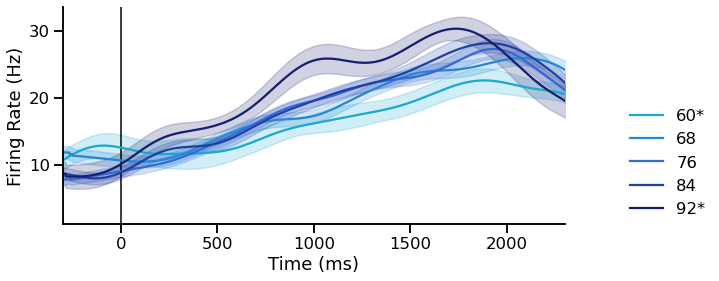

In [89]:
fig, ax = plt.subplots(1,1, figsize=(9,4))
plot_psth(g, xlim=(-300,2300), legend=True, error=True)

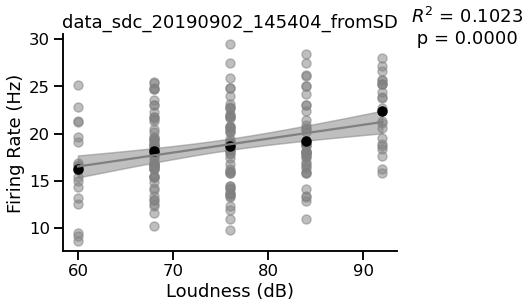

In [93]:
loudness_df = fr_by_loudness_df(g, sess_name)
regression_stats = regress_loudness_and_plot(loudness_df)

## CLASS stuff

In [48]:
sess_aligned[0].keys()

dict_keys(['aud1on', 'aud1off', 'aud2on', 'aud2off', 'trial_all', 'delay_overlap', 'delay2s', 'trial2s', 'delay4s', 'trial4s'])

In [59]:
class Trial():
    def __init__(self,dval):
        self.delay=dval
        return None

        
trial0 = Trial(2)
trial1 = Trial(4)
trial2 = Trial(4)

type(trial0)

trial0.delay,trial1.delay

trialL = [trial0,trial1]
for trial in trialL:
    print(trial.delay)

print(trial0==trial1)
print(trial1==trial2)
print(trial1)
print(trial1.delay==trial2.delay)



2
4
False
False
True


In [ ]:
class Neuron():
    def __init__(self):
        return None
    
class Trial():
    def __init__(self):
        return None

In [73]:
class Trial():
    def __init__(self,dval,sptimes):
        self.delay=dval
        self.sptimes = sptimes
        return None
    
    def get_spikes(self,thresh):
        allspikes = np.array(self.sptimes)
        spikes = allspikes[allspikes>=thresh]
        return spikes

trial10 = Trial(dval=2,sptimes = [-2,-1,0,1,2])

print('spike times relative to middle of trial',trial10.sptimes)

print('spiketimes thresholded',trial10.get_spikes(0))


spike times relative to middle of trial [-2, -1, 0, 1, 2]
spiketimes thresholded [0 1 2]
[0 1 2]


In [ ]:
trial10 = Trial(dval=2,sptimes = [-2,-1,0,1,2])
trial11 = Trial(dval=4,sptimes = [-12,-1,0,1,2])

trialL = [trial10,trial11]
for trial in trialL:
    if trial.delay==2:
        print(trial.get_spikes(0))

In [47]:
L = sess_aligned[neuronn]['aud1on'][trialn]
L # what was delay time (2 or 4?)

array([-0.36830063, -0.35060157, -0.34836836, -0.34046878, -0.3394355 ,
       -0.29040477, -0.28437176, -0.22484159, -0.20457601, -0.14037942,
       -0.04878429,  0.01164583,  0.05794337,  0.06460968,  0.10664078,
        0.12880627,  0.14900519,  0.16513767,  0.16783752,  0.53265146,
        0.58614861])

In [30]:
trialn = 2
neuronn= 0 
event = 'aud1on'

sess_aligned[neuronn][event][trialn]

array([-0.36830063, -0.35060157, -0.34836836, -0.34046878, -0.3394355 ,
       -0.29040477, -0.28437176, -0.22484159, -0.20457601, -0.14037942,
       -0.04878429,  0.01164583,  0.05794337,  0.06460968,  0.10664078,
        0.12880627,  0.14900519,  0.16513767,  0.16783752,  0.53265146,
        0.58614861])

In [21]:
sess_windows

{0: {'aud1on': [-400, 600],
  'aud1off': [-500, 500],
  'aud2on': [-400, 600],
  'aud2off': [-500, 500],
  'trial_all': [-100, 5000],
  'delay_overlap': [-600, 2600],
  'delay2s': [-150, 2150],
  'trial2s': [-200, 2400],
  'delay4s': [-150, 4150],
  'trial4s': [-200, 4400]},
 1: {'aud1on': [-400, 600],
  'aud1off': [-500, 500],
  'aud2on': [-400, 600],
  'aud2off': [-500, 500],
  'trial_all': [-100, 5000],
  'delay_overlap': [-600, 2600],
  'delay2s': [-150, 2150],
  'trial2s': [-200, 2400],
  'delay4s': [-150, 4150],
  'trial4s': [-200, 4400]},
 2: {'aud1on': [-400, 600],
  'aud1off': [-500, 500],
  'aud2on': [-400, 600],
  'aud2off': [-500, 500],
  'trial_all': [-100, 5000],
  'delay_overlap': [-600, 2600],
  'delay2s': [-150, 2150],
  'trial2s': [-200, 2400],
  'delay4s': [-150, 4150],
  'trial4s': [-200, 4400]},
 3: {'aud1on': [-400, 600],
  'aud1off': [-500, 500],
  'aud2on': [-400, 600],
  'aud2off': [-500, 500],
  'trial_all': [-100, 5000],
  'delay_overlap': [-600, 2600],
  'de

In [20]:
sess_windows[3]['trial_all']

[-100, 5000]

Test changes to plotting functions here with the session, save out to somewhere new.

Hits, all delay types, 'delay_overlap'